In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
matplotlib.rcParams['font.family'] = 'Malgun Gothic' # 맑은 고딕으로 지정
matplotlib.rcParams['axes.unicode_minus'] = False

In [3]:
# 공공 데이터 포탈에서 다운받은 '소상공인시장진흥공단_상가(상권)정보_대구_202312.csv'을 사용.
# 1. [상권업종중분류명]이 '부동산 서비스'인 데이터만 따로 데이터프레임으로 생성. -> df1
# 2. df1에서 
# 상가업소번호, 상호명, 상권업종대분류명, 상권업종중분류명, 상권업종소분류명, 시도명, 시군구명, 법정동명만 남기고 나머지 컬럼은 삭제 -> df2
# 
# 3. seaborn의 countplot()을 이용해서 각 구별 상점수를 그래프 출력.
# 
# 4. seaborn의 barplot()을 이용해서 수성구의 상점수를 각 동별로  그래프 출력 (상점수가 많은 동 순서로 정렬).
# 
# 5. matplotlib의 pie()를 이용해서 수성구의 상점수를 각 동별로  그래프 출력. (몇 퍼센트인지 나오도록)

df = pd.read_csv('./input/소상공인시장진흥공단_상가(상권)정보_대구_202312.csv')
df.head()

,상가업소번호,상호명,지점명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,표준산업분류코드,...,건물관리번호,건물명,도로명주소,구우편번호,신우편번호,동정보,층정보,호정보,경도,위도
0,MA0101202210A0090318,아보카,NaN,I2,음식,I203,일식,I20301,일식 회/초밥,I56122,...,2729011600110100000000001,NaN,대구광역시 달서구 수밭동길 34,704802,42835,NaN,1,NaN,128.549749,35.795445
1,MA010120220805430943,모텔탑,NaN,I1,숙박,I101,일반 숙박,I10102,여관/모텔,I55102,...,2714014200100370005004100,NaN,대구광역시 동구 파계로138길 40,701500,41001,NaN,NaN,NaN,128.639751,35.992577
2,MA010120220805432876,킴스헤어,NaN,S2,수리·개인,S207,이용·미용,S20701,미용실,S96112,...,2723011400106790000009408,대구동서변그린빌,대구광역시 북구 동변로 55,702733,41414,NaN,1,NaN,128.602432,35.916799
3,MA010120220805435697,카페사람이야기,NaN,I2,음식,I212,비알코올,I21201,카페,I56221,...,2714012300110990000000001,NaN,대구광역시 동구 이노밸리로46길 4-9,701290,41067,NaN,1,NaN,128.721839,35.877366
4,MA010120220805435246,다즐링,NaN,I2,음식,I212,비알코올,I21201,카페,I56221,...,2714010200103510034044815,NaN,대구광역시 동구 화랑로 23,701829,41252,NaN,1,NaN,128.631047,35.868657


In [6]:
df1 = df[df['상권업종중분류명'] == '부동산 서비스']
df1.head()

,상가업소번호,상호명,지점명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,표준산업분류코드,...,건물관리번호,건물명,도로명주소,구우편번호,신우편번호,동정보,층정보,호정보,경도,위도
9,MA010120220805439984,부경부동산중개,NaN,L1,부동산,L102,부동산 서비스,L10203,부동산 중개/대리업,L68221,...,2726010100100410009019659,NaN,대구광역시 수성구 상록로 8,706817,42019,NaN,2,NaN,128.624191,35.860022
20,MA010120220805449536,SB공인중개사무소,NaN,L1,부동산,L102,부동산 서비스,L10203,부동산 중개/대리업,L68221,...,2729011200103710014017531,NaN,대구광역시 달서구 와룡로53길 19,704932,42631,NaN,3,NaN,128.536144,35.856653
26,MA010120220805458266,달성매일공인중개사사무소,NaN,L1,부동산,L102,부동산 서비스,L10203,부동산 중개/대리업,L68221,...,2771025328108030059040554,NaN,대구광역시 달성군 논공읍 논공로9길 78,711857,42979,NaN,NaN,NaN,128.443665,35.730121
50,MA010120220805478608,유진기획,NaN,L1,부동산,L102,부동산 서비스,L10203,부동산 중개/대리업,L68221,...,2720010300121510004013110,NaN,대구광역시 남구 양지로 102,705816,42455,NaN,NaN,NaN,128.579396,35.851396
61,MA010120220805489131,365대박부동산공인중개사사무소,NaN,L1,부동산,L102,부동산 서비스,L10203,부동산 중개/대리업,L68221,...,2714010200102600005026861,NaN,대구광역시 동구 동부로16길 68,701826,41258,NaN,1,NaN,128.621821,35.872752


In [7]:
df2 = df1[['상가업소번호', '상호명', '상권업종대분류명', '상권업종중분류명', '상권업종소분류명', '시도명', '시군구명', '법정동명']]
df2.head()

,상가업소번호,상호명,상권업종대분류명,상권업종중분류명,상권업종소분류명,시도명,시군구명,법정동명
9,MA010120220805439984,부경부동산중개,부동산,부동산 서비스,부동산 중개/대리업,대구광역시,수성구,범어동
20,MA010120220805449536,SB공인중개사무소,부동산,부동산 서비스,부동산 중개/대리업,대구광역시,달서구,죽전동
26,MA010120220805458266,달성매일공인중개사사무소,부동산,부동산 서비스,부동산 중개/대리업,대구광역시,달성군,논공읍
50,MA010120220805478608,유진기획,부동산,부동산 서비스,부동산 중개/대리업,대구광역시,남구,대명동
61,MA010120220805489131,365대박부동산공인중개사사무소,부동산,부동산 서비스,부동산 중개/대리업,대구광역시,동구,신천동


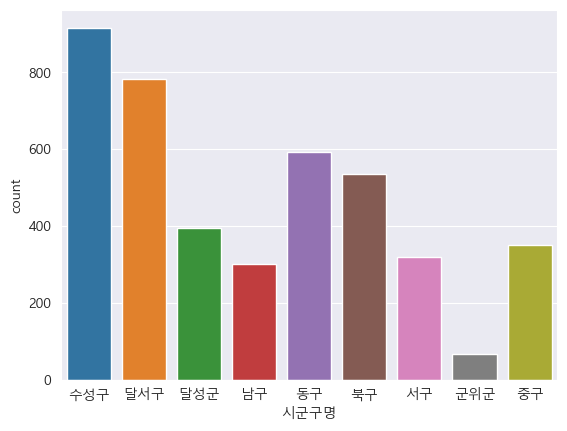

In [11]:
sns.countplot(data=df2, x='시군구명')
plt.show()

In [39]:
df3= df2[df2['시군구명'] == '수성구']
df3.value_counts('법정동명')

법정동명
범어동      256
만촌동      103
황금동       72
지산동       72
두산동       65
상동        55
시지동       47
수성동1가     39
중동        31
신매동       30
수성동4가     29
범물동       23
매호동       21
수성동3가     18
파동        13
수성동2가     12
사월동       11
대흥동       10
연호동        4
욱수동        4
성동         1
가천동        1
Name: count, dtype: int64

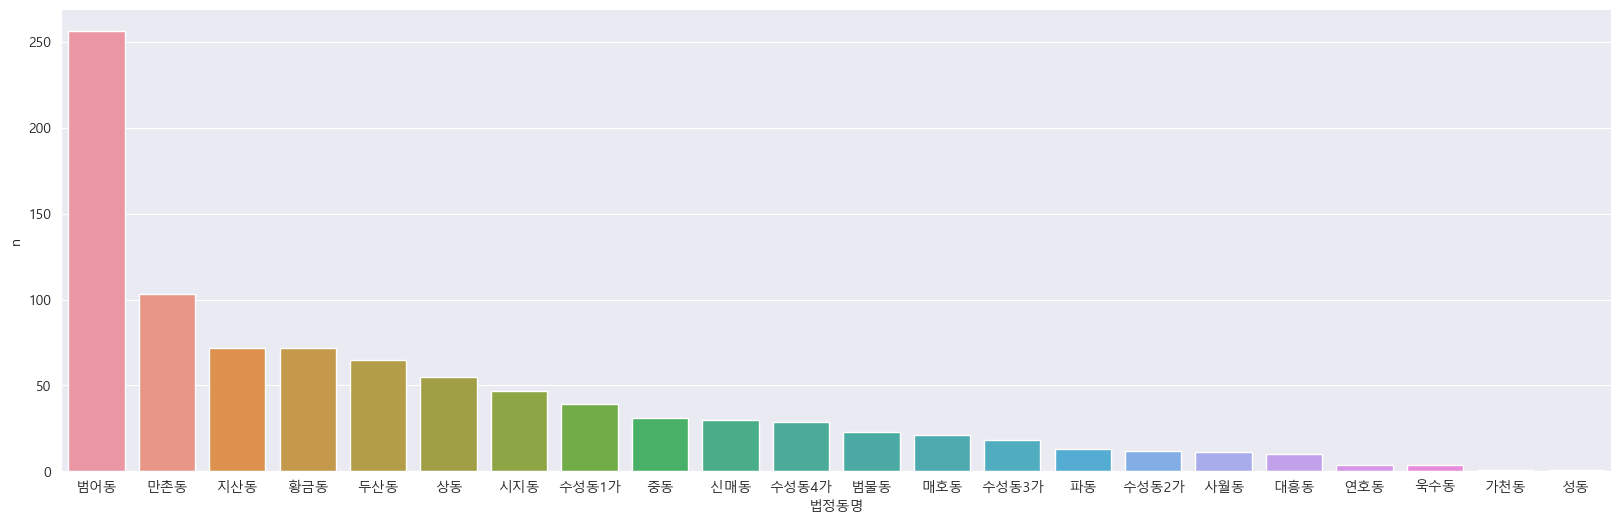

In [45]:
df4= df3.groupby('법정동명', as_index=False).agg(n=('법정동명', 'count'))

plt.figure(figsize=(20,6))
sns.barplot(data=df4, x='법정동명', y='n', order=df3['법정동명'].value_counts().index)
plt.show()

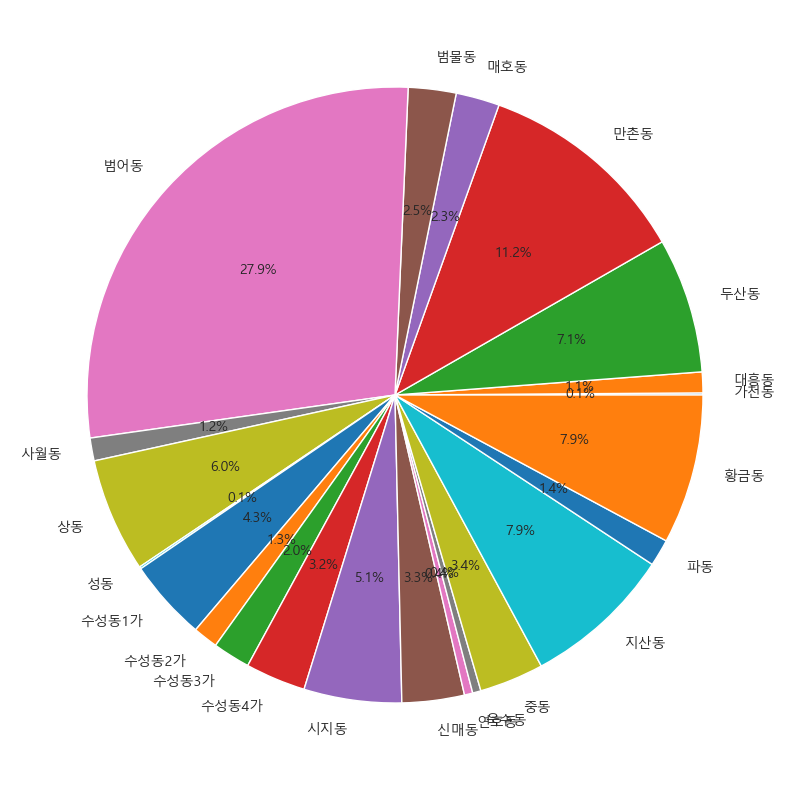

In [65]:
plt.figure(figsize=(10,10))
plt.pie(df4['n'], labels=df4['법정동명'], autopct='%1.1f%%')
plt.show()

In [67]:
da1 = pd.read_csv('./input/TCS_대구경북권톨게이트진출입일교통량_1일_분기_2023_4qt.csv', encoding='cp949')
da1.head()

,집계일자,영업소코드,영업소명,입출구구분코드,입출구명,TCS하이패스구분코드,TCS하이패스명,고속도로운영기관구분코드,고속도로운영기관명,영업형태구분코드,영업형태명,1종교통량,2종교통량,3종교통량,4종교통량,5종교통량,6종교통량,총교통량
0,2023-10-01,203,가산,0,입구,1,TCS,0,한국도로공사,0,폐쇄식,1045,2,9,2,2,4,1064
1,2023-10-01,203,가산,0,입구,2,hi-pass,0,한국도로공사,0,폐쇄식,12150,50,59,44,32,355,12690
2,2023-10-01,203,가산,1,출구,1,TCS,0,한국도로공사,0,폐쇄식,889,2,7,5,4,127,1034
3,2023-10-01,203,가산,1,출구,2,hi-pass,0,한국도로공사,0,폐쇄식,8670,56,31,21,18,250,9046
4,2023-10-01,274,가조,0,입구,1,TCS,0,한국도로공사,0,폐쇄식,292,0,0,1,0,3,296


In [76]:
da2 = da1[['집계일자', '영업소명', '입출구명', 'TCS하이패스명', '총교통량']]
da2

,집계일자,영업소명,입출구명,TCS하이패스명,총교통량
0,2023-10-01,가산,입구,TCS,1064
1,2023-10-01,가산,입구,hi-pass,12690
2,2023-10-01,가산,출구,TCS,1034
3,2023-10-01,가산,출구,hi-pass,9046
4,2023-10-01,가조,입구,TCS,296
...,...,...,...,...,...
21523,2023-12-31,해인사,출구,hi-pass,2518
21524,2023-12-31,화원옥포,입구,TCS,812
21525,2023-12-31,화원옥포,입구,hi-pass,8943
21526,2023-12-31,화원옥포,출구,TCS,812


In [78]:
da3 = da2[da2['집계일자'] == '2023-10-01']
da3

,집계일자,영업소명,입출구명,TCS하이패스명,총교통량
0,2023-10-01,가산,입구,TCS,1064
1,2023-10-01,가산,입구,hi-pass,12690
2,2023-10-01,가산,출구,TCS,1034
3,2023-10-01,가산,출구,hi-pass,9046
4,2023-10-01,가조,입구,TCS,296
...,...,...,...,...,...
229,2023-10-01,해인사,출구,hi-pass,4240
230,2023-10-01,화원옥포,입구,TCS,1246
231,2023-10-01,화원옥포,입구,hi-pass,12197
232,2023-10-01,화원옥포,출구,TCS,1201


In [94]:
da4 = da3.groupby('영업소명', as_index=False).agg(n=('총교통량', 'sum'))
da4

,영업소명,n
0,가산,23834
1,가조,8903
2,거창,19681
3,건천,15444
4,경산,29849
5,경주,67342
6,고령,18694
7,구미,31533
8,군위,13256
9,김천,13886


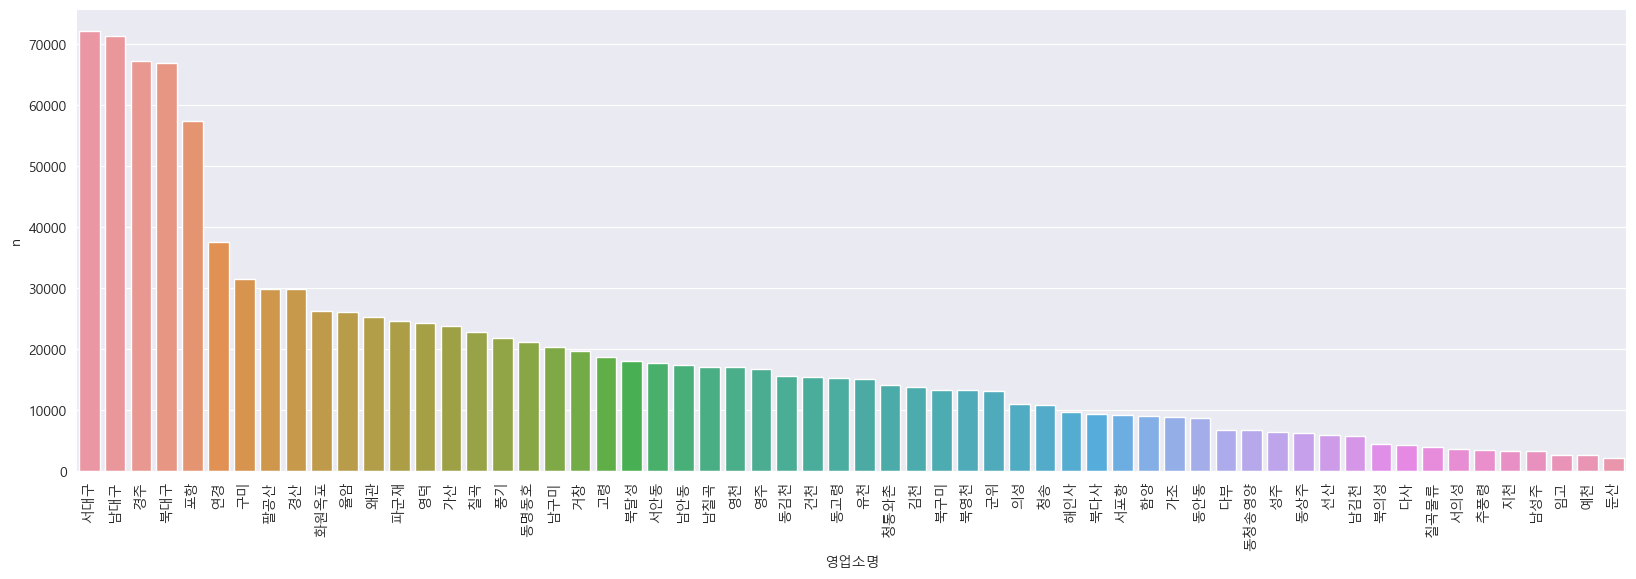

In [93]:
da4.sort_values(by='n', ascending=False, inplace=True)
plt.figure(figsize=(20,6))
plt.xticks(rotation=90)
sns.barplot(data=da4, x='영업소명', y='n')
plt.show()